In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T02:37:53.002373+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.811981201171875e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.1286609172821045}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00573420524597168}
!!! {"init_...": 0.0006203651428222656}
!!! {"ete3Tree": 0.5527684688568115}
!!! {"GenomeTree_hierarchical": 0.0022330284118652344}
!!! {"mutateBranchETEhierarchy": 0.09295105934143066}
!!! {"write_genome_short": 0.04739236831665039}


  1%|          | 1/193 [00:01<03:52,  1.21s/it]

!!! {"writeGenomeNoIndels": 0.16634273529052734}
!!! {"pl.DataFrame": 0.04619860649108887}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9200615882873535}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.018701553344726562}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003530263900756836}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014734268188476562}
!!! {"init_...": 0.0004940032958984375}
!!! {"ete3Tree": 7.843971252441406e-05}
!!! {"GenomeTree_hierarchical": 0.0021648406982421875}
!!! {"mutateBranchETEhierarchy": 1.6689300537109375e-05}
!!! {"write_genome_short": 0.000673055648

  7%|▋         | 13/193 [00:01<00:13, 13.58it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003794431686401367}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014543533325195312}
!!! {"init_...": 0.0005049705505371094}
!!! {"ete3Tree": 8.821487426757812e-05}
!!! {"GenomeTree_hierarchical": 0.0022535324096679688}
!!! {"mutateBranchETEhierarchy": 1.5974044799804688e-05}
!!! {"write_genome_short": 7.772445678710938e-05}
!!! {"writeGenomeNoIndels": 1.0967254638671875e-05}
!!! {"pl.DataFrame": 0.00011610984802246094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005136728286743164}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003

 12%|█▏        | 24/193 [00:01<00:07, 24.04it/s]

!!! {"phastSimRun": 0.00014162063598632812}
!!! {"init_...": 0.0005788803100585938}
!!! {"ete3Tree": 0.00010657310485839844}
!!! {"GenomeTree_hierarchical": 0.002213001251220703}
!!! {"mutateBranchETEhierarchy": 1.52587890625e-05}
!!! {"write_genome_short": 0.00025153160095214844}
!!! {"writeGenomeNoIndels": 1.1205673217773438e-05}
!!! {"pl.DataFrame": 0.00010180473327636719}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005681514739990234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022530555725097656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032701492309570312}
enter log_context_duration for _d

 18%|█▊        | 34/193 [00:01<00:05, 31.76it/s]

!!! {"write_genome_short": 0.0028066635131835938}
!!! {"writeGenomeNoIndels": 0.005438566207885742}
!!! {"pl.DataFrame": 0.0010914802551269531}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03221249580383301}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0007786750793457031}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032935142517089844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001583099365234375}
!!! {"init_...": 0.0004744529724121094}
!!! {"ete3Tree": 6.961822509765625e-05}
!!! {"GenomeTree_hierarchical": 0.0021178722381591797}
!!! {"mutateBranchETEhierarchy": 1.12056732

 23%|██▎       | 45/193 [00:02<00:03, 37.25it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 4.744529724121094e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003611326217651367}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001289844512939453}
!!! {"init_...": 0.0004439353942871094}
!!! {"ete3Tree": 7.295608520507812e-05}
!!! {"GenomeTree_hierarchical": 0.0027358531951904297}
!!! {"mutateBranchETEhierarchy": 1.1682510375976562e-05}
!!! {"write_genome_short": 6.985664367675781e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 9.703636169433594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005335807800292969}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000262

 26%|██▋       | 51/193 [00:02<00:03, 41.60it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=44, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004057407379150391}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013065338134765625}
!!! {"init_...": 0.0004515647888183594}
!!! {"ete3Tree": 0.00034737586975097656}
!!! {"GenomeTree_hierarchical": 0.002208709716796875}
!!! {"mutateBranchETEhierarchy": 6.914138793945312e-05}
!!! {"write_genome_short": 0.00010704994201660156}
!!! {"writeGenomeNoIndels": 0.00010085105895996094}
!!! {"pl.DataFrame": 0.00014090538024902344}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0053558349609375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002

 33%|███▎      | 63/193 [00:02<00:02, 48.19it/s]

!!! {"write_genome_short": 0.000576019287109375}
!!! {"writeGenomeNoIndels": 1.3828277587890625e-05}
!!! {"pl.DataFrame": 9.059906005859375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006094932556152344}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026798248291015625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=12, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033168792724609375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014662742614746094}
!!! {"init_...": 0.0005021095275878906}
!!! {"ete3Tree": 0.0001456737518310547}
!!! {"GenomeTree_hierarchical": 0.002345561981201172}
!!! {"mutateBranchETEhierarchy": 3.0279

 39%|███▉      | 75/193 [00:02<00:02, 49.37it/s]

!!! {"phastSimRun": 0.00014662742614746094}
!!! {"init_...": 0.0006814002990722656}
!!! {"ete3Tree": 7.82012939453125e-05}
!!! {"GenomeTree_hierarchical": 0.003452301025390625}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 0.00011920928955078125}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00011873245239257812}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006898164749145508}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003094673156738281}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034372806549072266}
enter log_context_duration for 

 42%|████▏     | 81/193 [00:03<00:04, 23.69it/s]

!!! {"mutateBranchETEhierarchy": 0.371826171875}
!!! {"write_genome_short": 0.0015003681182861328}
!!! {"writeGenomeNoIndels": 0.002879619598388672}
!!! {"pl.DataFrame": 0.0006945133209228516}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3892076015472412}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006012916564941406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00431060791015625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000148773193359375}
!!! {"init_...": 0.0005211830139160156}
!!! {"ete3Tree": 0.003996610641479492}
!!! {"GenomeTree_hierarchical": 0.002111673355102539

 47%|████▋     | 90/193 [00:03<00:03, 27.33it/s]

!!! {"write_genome_short": 0.0003864765167236328}
!!! {"writeGenomeNoIndels": 5.221366882324219e-05}
!!! {"pl.DataFrame": 0.00012636184692382812}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0056269168853759766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021266937255859375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003172159194946289}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012993812561035156}
!!! {"init_...": 0.0004210472106933594}
!!! {"ete3Tree": 6.508827209472656e-05}
!!! {"GenomeTree_hierarchical": 0.0025856494903564453}
!!! {"mutateBranchETEhierarchy": 1.001

 50%|█████     | 97/193 [00:03<00:02, 33.84it/s]

!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.0005273818969726562}
!!! {"ete3Tree": 5.91278076171875e-05}
!!! {"GenomeTree_hierarchical": 0.0021572113037109375}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-06}
!!! {"write_genome_short": 6.723403930664062e-05}
!!! {"writeGenomeNoIndels": 5.9604644775390625e-06}
!!! {"pl.DataFrame": 7.176399230957031e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004916667938232422}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018644332885742188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031151771545410156}
enter log_context_duration for 

 56%|█████▋    | 109/193 [00:03<00:02, 40.78it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7894973754882812e-05}
len(phylogeny_df)=8, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036115646362304688}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010895729064941406}
!!! {"init_...": 0.0004456043243408203}
!!! {"ete3Tree": 0.00010204315185546875}
!!! {"GenomeTree_hierarchical": 0.0021142959594726562}
!!! {"mutateBranchETEhierarchy": 1.8835067749023438e-05}
!!! {"write_genome_short": 9.465217590332031e-05}
!!! {"writeGenomeNoIndels": 2.0265579223632812e-05}
!!! {"pl.DataFrame": 9.632110595703125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004647493362426758}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 63%|██████▎   | 122/193 [00:04<00:01, 47.93it/s]

!!! {"init_...": 0.0007991790771484375}
!!! {"ete3Tree": 0.00018310546875}
!!! {"GenomeTree_hierarchical": 0.0028181076049804688}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 0.00010967254638671875}
!!! {"writeGenomeNoIndels": 1.049041748046875e-05}
!!! {"pl.DataFrame": 9.465217590332031e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005966663360595703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019049644470214844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031588077545166016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010752

 70%|██████▉   | 135/193 [00:04<00:01, 53.59it/s]

!!! {"phastSimRun": 0.00010776519775390625}
!!! {"init_...": 0.0006039142608642578}
!!! {"ete3Tree": 0.00018095970153808594}
!!! {"GenomeTree_hierarchical": 0.0030744075775146484}
!!! {"mutateBranchETEhierarchy": 3.409385681152344e-05}
!!! {"write_genome_short": 9.822845458984375e-05}
!!! {"writeGenomeNoIndels": 5.269050598144531e-05}
!!! {"pl.DataFrame": 8.249282836914062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006300926208496094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001900196075439453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031363964080810547}
enter log_context_duration for 

 74%|███████▎  | 142/193 [00:04<00:00, 55.88it/s]

!!! {"phastSimRun": 0.00011038780212402344}
!!! {"init_...": 0.0006046295166015625}
!!! {"ete3Tree": 0.00018024444580078125}
!!! {"GenomeTree_hierarchical": 0.0021810531616210938}
!!! {"mutateBranchETEhierarchy": 3.647804260253906e-05}
!!! {"write_genome_short": 8.559226989746094e-05}
!!! {"writeGenomeNoIndels": 5.125999450683594e-05}
!!! {"pl.DataFrame": 8.630752563476562e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005505561828613281}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019240379333496094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031538009643554688}
enter log_context_duration for

 77%|███████▋  | 148/193 [00:04<00:01, 42.49it/s]

!!! {"writeGenomeNoIndels": 0.010849475860595703}
!!! {"pl.DataFrame": 0.0021147727966308594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.054262638092041016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0016121864318847656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009352445602416992}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013399124145507812}
!!! {"init_...": 0.00048804283142089844}
!!! {"ete3Tree": 0.03028273582458496}
!!! {"GenomeTree_hierarchical": 0.002819061279296875}
!!! {"mutateBranchETEhierarchy": 0.00566554069519043}
!!! {"write_genome_short": 0.0031087398

 80%|████████  | 155/193 [00:04<00:00, 43.94it/s]

!!! {"phastSimRun": 0.00017309188842773438}
!!! {"init_...": 0.0004603862762451172}
!!! {"ete3Tree": 0.01392364501953125}
!!! {"GenomeTree_hierarchical": 0.002048969268798828}
!!! {"mutateBranchETEhierarchy": 0.0032792091369628906}
!!! {"write_genome_short": 0.0017049312591552734}
!!! {"writeGenomeNoIndels": 0.0057220458984375}
!!! {"pl.DataFrame": 0.0011436939239501953}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03131914138793945}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0007781982421875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003203868865966797}
enter log_context_duration for _do_run_phas

 83%|████████▎ | 160/193 [00:06<00:02, 13.18it/s]

!!! {"GenomeTree_hierarchical": 0.3686943054199219}
!!! {"mutateBranchETEhierarchy": 0.04508781433105469}
!!! {"write_genome_short": 0.02146315574645996}
!!! {"writeGenomeNoIndels": 0.07243204116821289}
!!! {"pl.DataFrame": 0.014829158782958984}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.7022387981414795}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.006005764007568359}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032465457916259766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013566017150878906}
!!! {"init_...": 0.0004906654357910156}
!!! {"ete3Tree": 8.559226989746094e-05}

 85%|████████▌ | 165/193 [00:06<00:01, 16.11it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=625, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004993438720703125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010204315185546875}
!!! {"init_...": 0.0004367828369140625}
!!! {"ete3Tree": 0.0036072731018066406}
!!! {"GenomeTree_hierarchical": 0.002681732177734375}
!!! {"mutateBranchETEhierarchy": 0.0008823871612548828}
!!! {"write_genome_short": 0.0005297660827636719}
!!! {"writeGenomeNoIndels": 0.0014748573303222656}
!!! {"pl.DataFrame": 0.0003440380096435547}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011575698852539062}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00033

 92%|█████████▏| 178/193 [00:06<00:00, 23.42it/s]

!!! {"ete3Tree": 0.0644993782043457}
!!! {"GenomeTree_hierarchical": 0.002021312713623047}
!!! {"mutateBranchETEhierarchy": 0.015031576156616211}
!!! {"write_genome_short": 0.0074117183685302734}
!!! {"writeGenomeNoIndels": 0.025497913360595703}
!!! {"pl.DataFrame": 0.004798173904418945}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12161493301391602}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002359628677368164}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032587051391601562}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001347064971923828}
!!! {"init_...": 0.000494956970214

 95%|█████████▍| 183/193 [00:06<00:00, 26.94it/s]

!!! {"ete3Tree": 0.009734392166137695}
!!! {"GenomeTree_hierarchical": 0.002028226852416992}
!!! {"mutateBranchETEhierarchy": 0.0022268295288085938}
!!! {"write_genome_short": 0.0017266273498535156}
!!! {"writeGenomeNoIndels": 0.0036513805389404297}
!!! {"pl.DataFrame": 0.0007348060607910156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0221710205078125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005691051483154297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031251907348632812}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010180473327636719}
!!! {"init_...": 0.000420093

100%|██████████| 193/193 [00:06<00:00, 28.05it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003587007522583008}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015163421630859375}
!!! {"init_...": 0.0005109310150146484}
!!! {"ete3Tree": 7.963180541992188e-05}
!!! {"GenomeTree_hierarchical": 0.002369403839111328}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 7.772445678710938e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.00012111663818359375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0052127838134765625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000

exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2674703598022461}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03297066688537598}
enter log_context_duration for _add_sequence_diffs


 29%|██▊       | 2/7 [00:00<00:00, 19.73it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0027282238006591797}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03362321853637695}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.014545679092407227}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002669811248779297}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03297162055969238}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0026755332946777344}
enter log_context_duration for seq_ar

100%|██████████| 7/7 [00:00<00:00, 22.77it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03333640098571777}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002420186996459961}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0027222633361816406}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033399343490600586}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003602743148803711}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015327930450439453}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 1.6689300537109375e-05}
enter log_context_duration for mismatches
exit log_context_duration for mis

exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2831578254699707}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.18882346153259277}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 4086/4086 [00:25<00:00, 160.74it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.086010932922363}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 621.76it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 141.73978090286255}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06814289093017578}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 201.71200847625732}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008956670761108398}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.000347137451171875}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00039386749267578125}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0003993511199951172}
ancestral_


100%|██████████| 368/368 [00:00<00:00, 301054.00it/s]

process mutations:   0%|          | 1/368 [00:00<01:11,  5.12it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:15<12:12,  2.03s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.4s



process mutations:  13%|█▎        | 48/368 [00:58<06:18,  1.18s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min



process mutations:  24%|██▍       | 88/368 [01:42<05:20,  1.14s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.8min



process mutations:  35%|███▍      | 128/368 [02:28<04:34,  1.14s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.6min



process mutations:  46%|████▌     | 168/368 [03:12<03:44,  1.12s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.3min



process mutations:  57%|█████▋    | 208/368 [03:55<02:57,  1.11s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.2min



process mutations:  67%|██████▋   | 248/368 [04:41<02:14,  1.12s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.9min



process mutations:  78%|███████▊  | 288/368 [05:26<01:30,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.7min



process mutations:  89%|████████▉ | 328/368 [06:11<00:45,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.4min



process mutations: 100%|██████████| 368/368 [07:00<00:00,  1.14s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  7.0min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  7.1min finished


process replicate: 100%|██████████| 1/1 [10:33<00:00, 633.32s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.08521366119384766}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '7ce699c6-9b05-869f-9bf2-1514edba62a6', '7ce699c6-9b05-869f-9bf2-1514edba62a6', '7ce699c6-9b05-869f-9bf2-1514ed
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


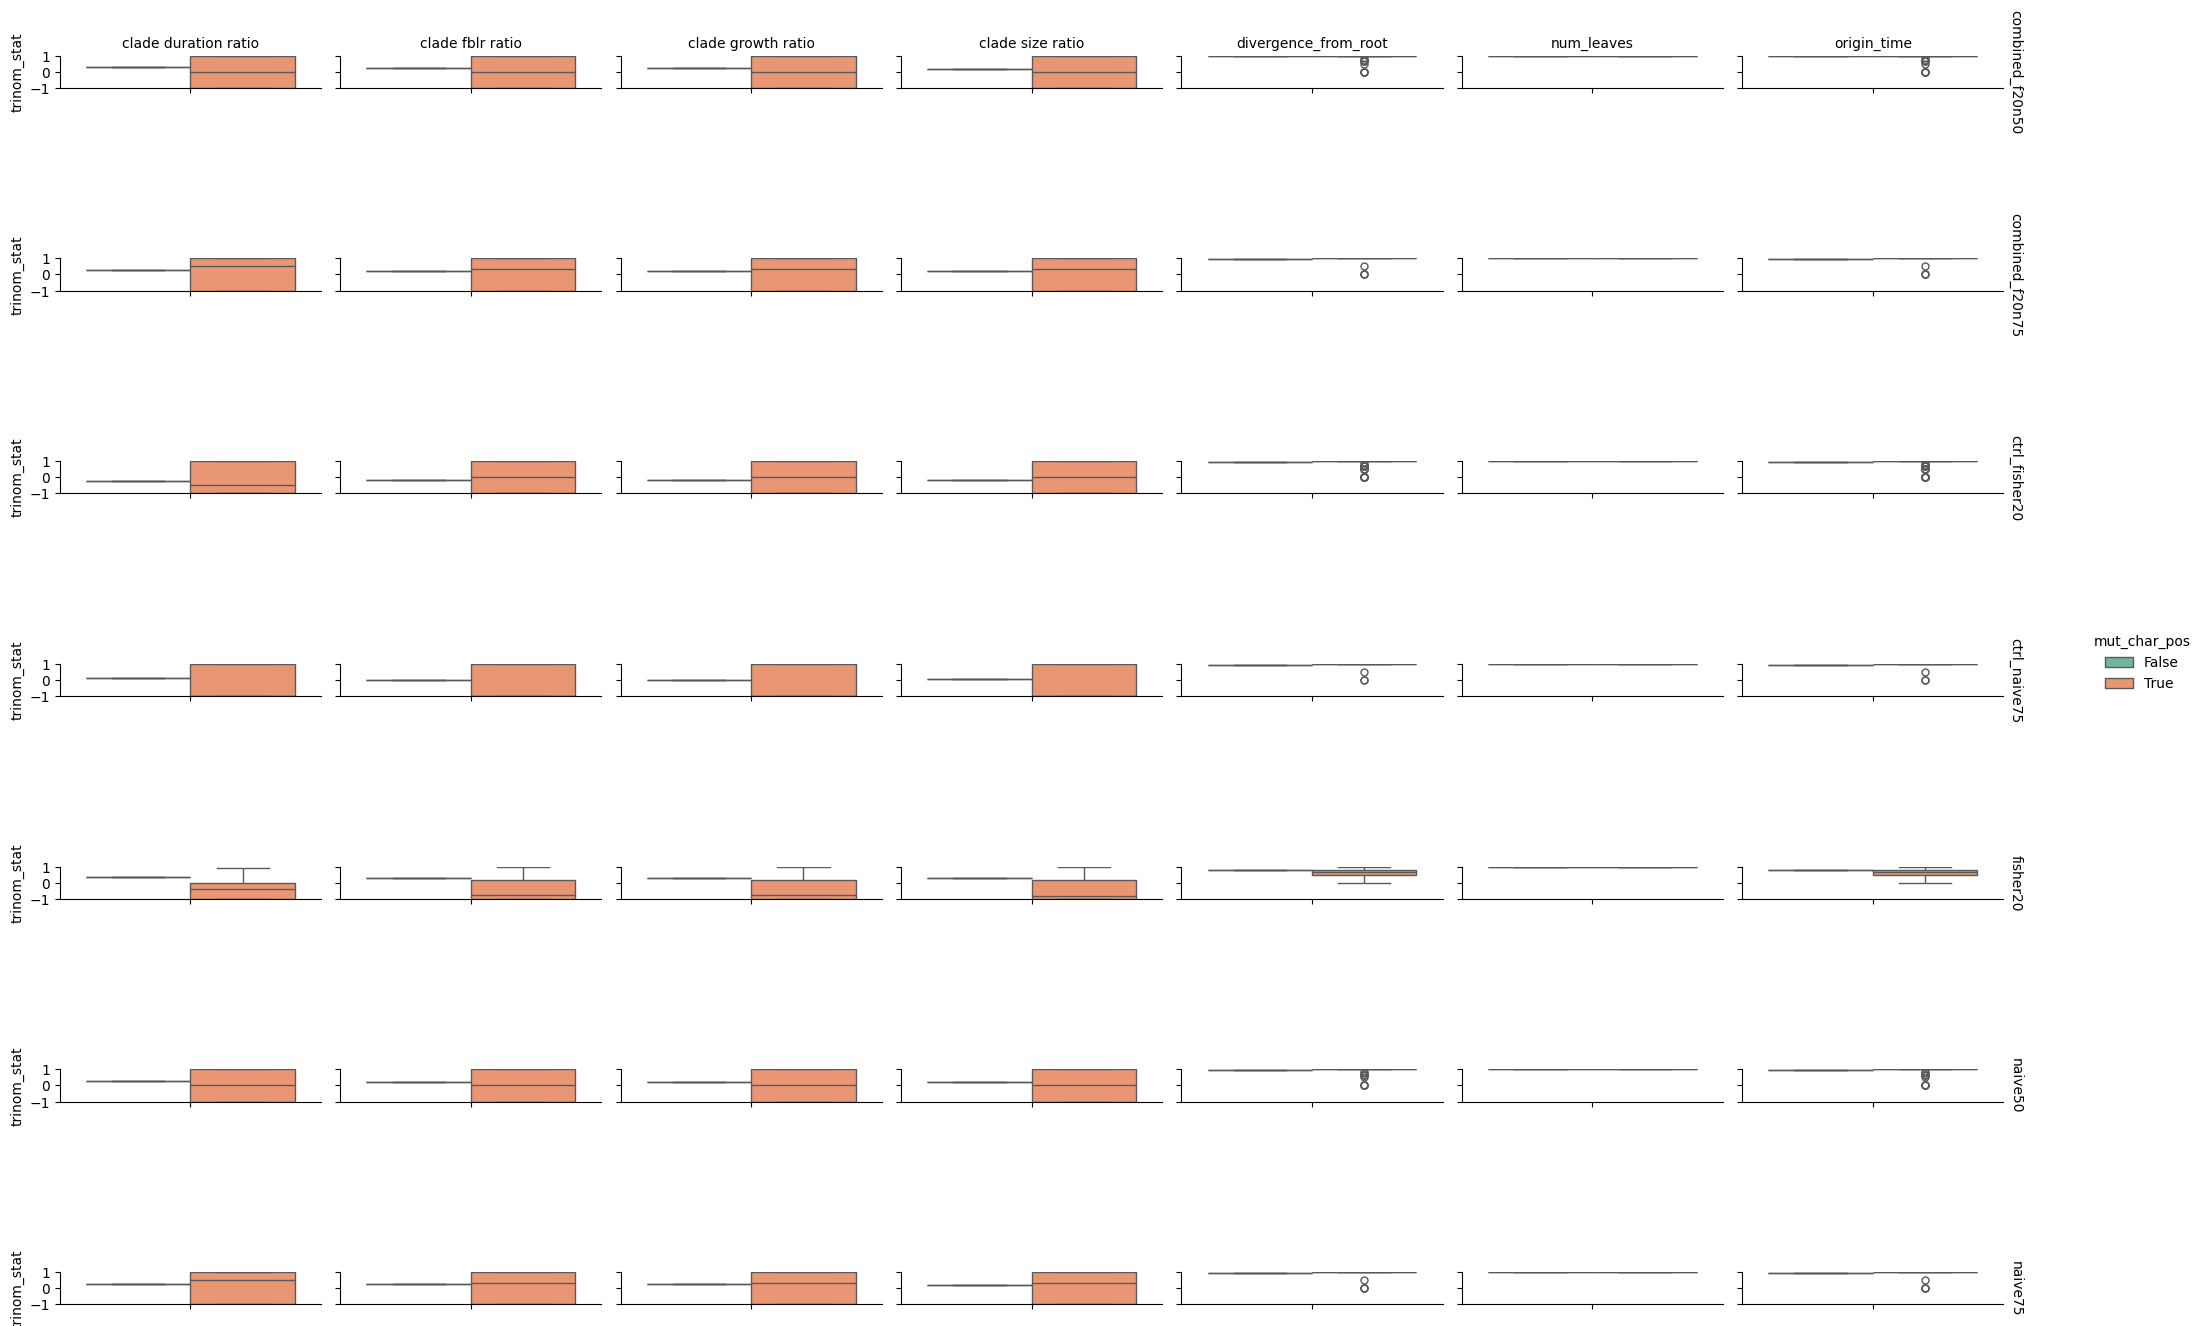

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


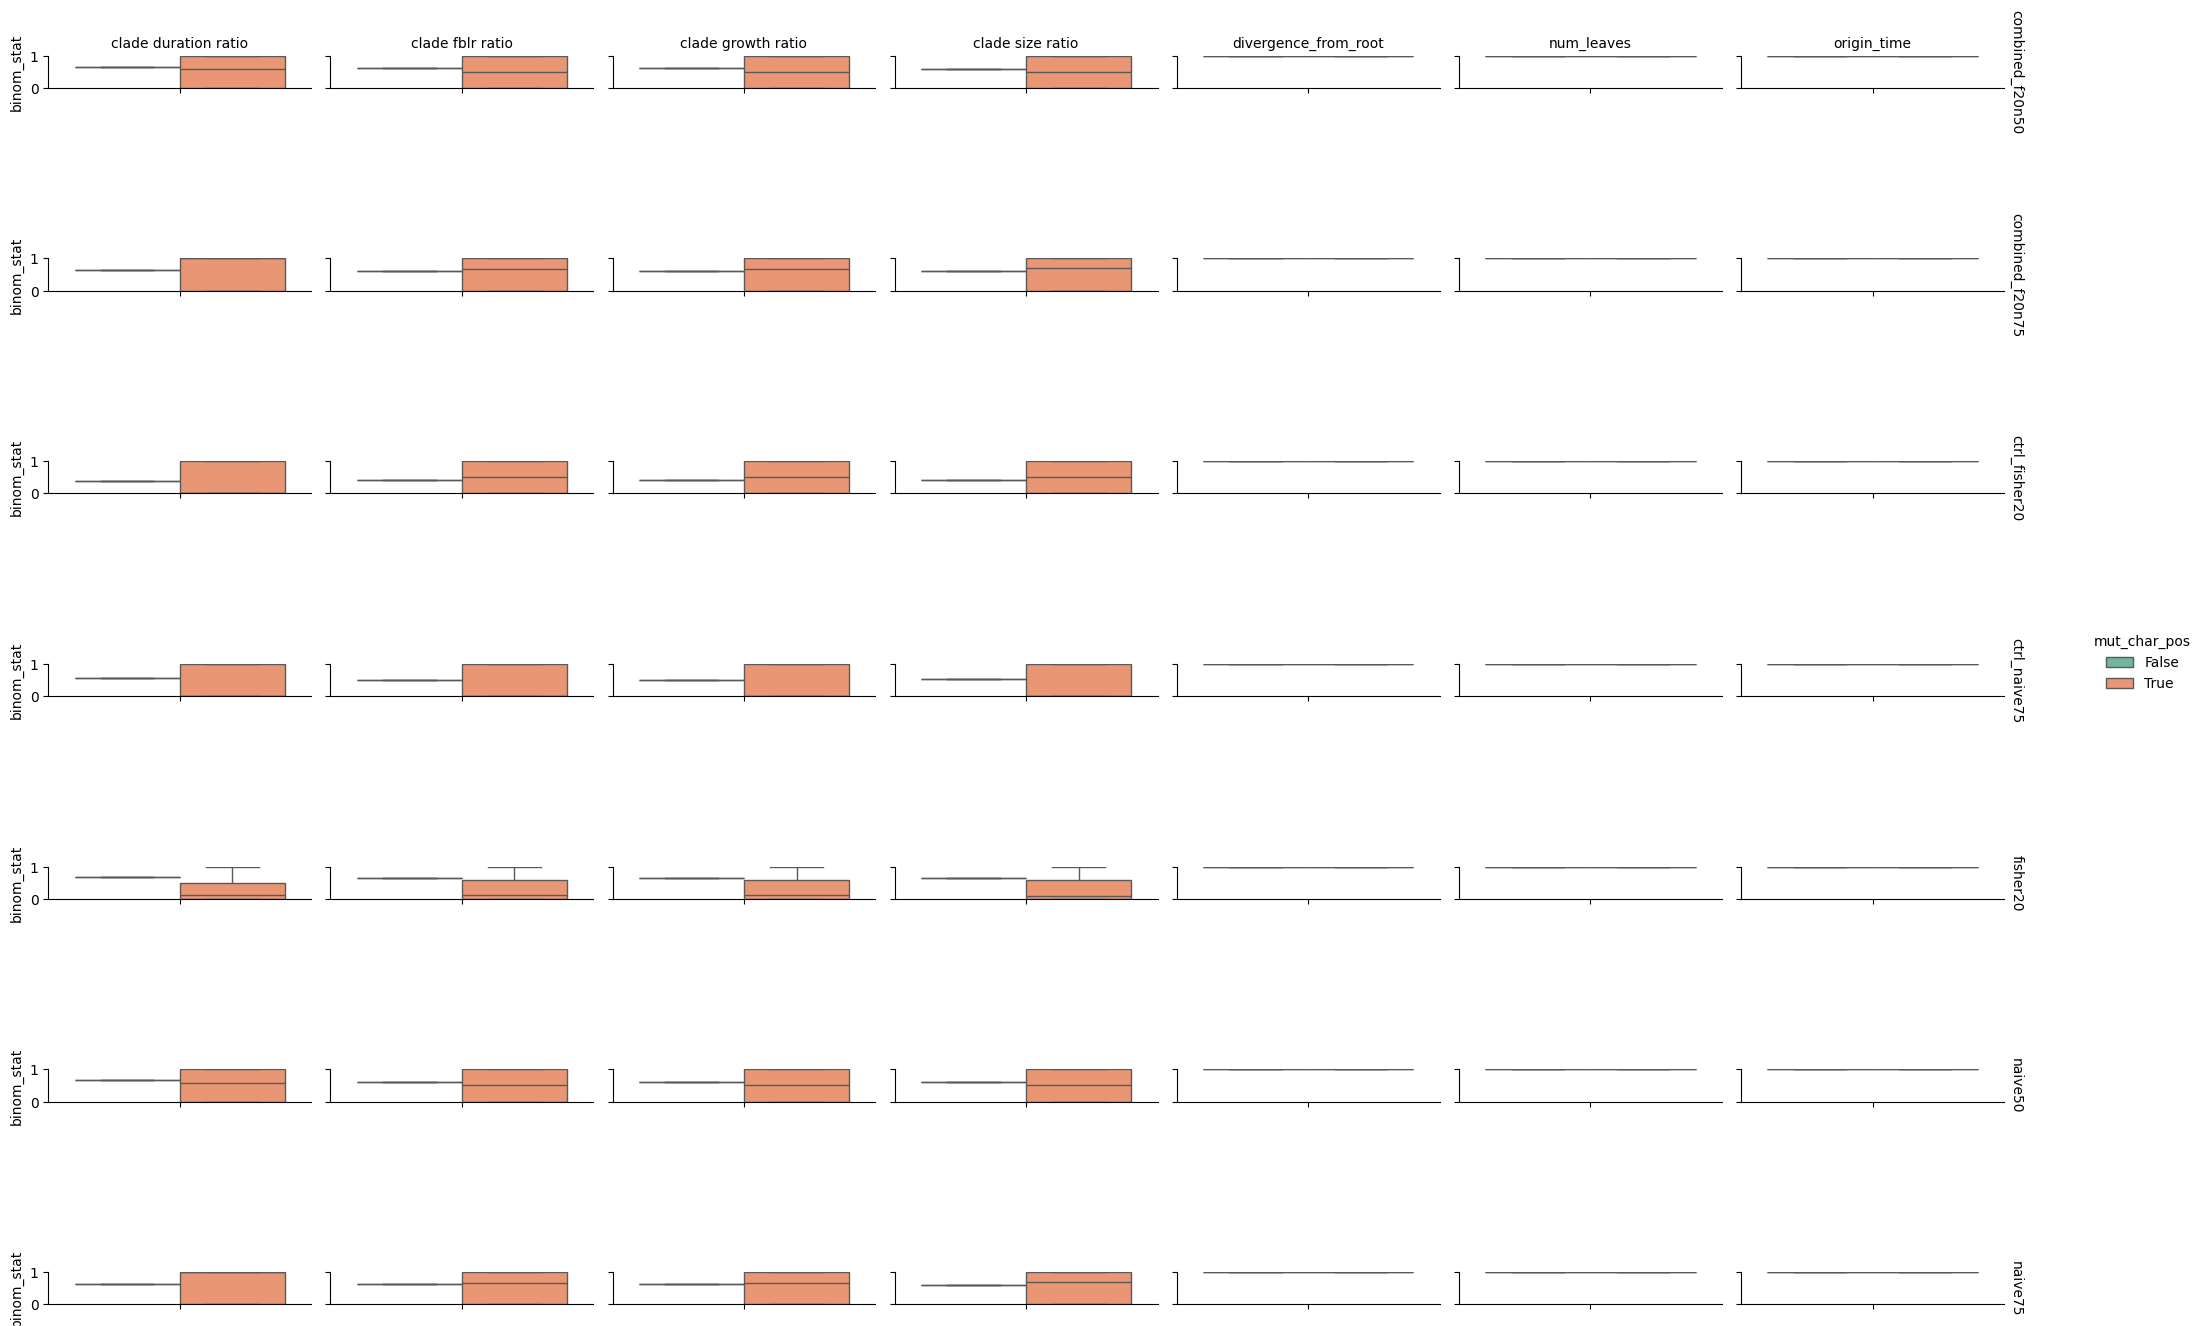

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


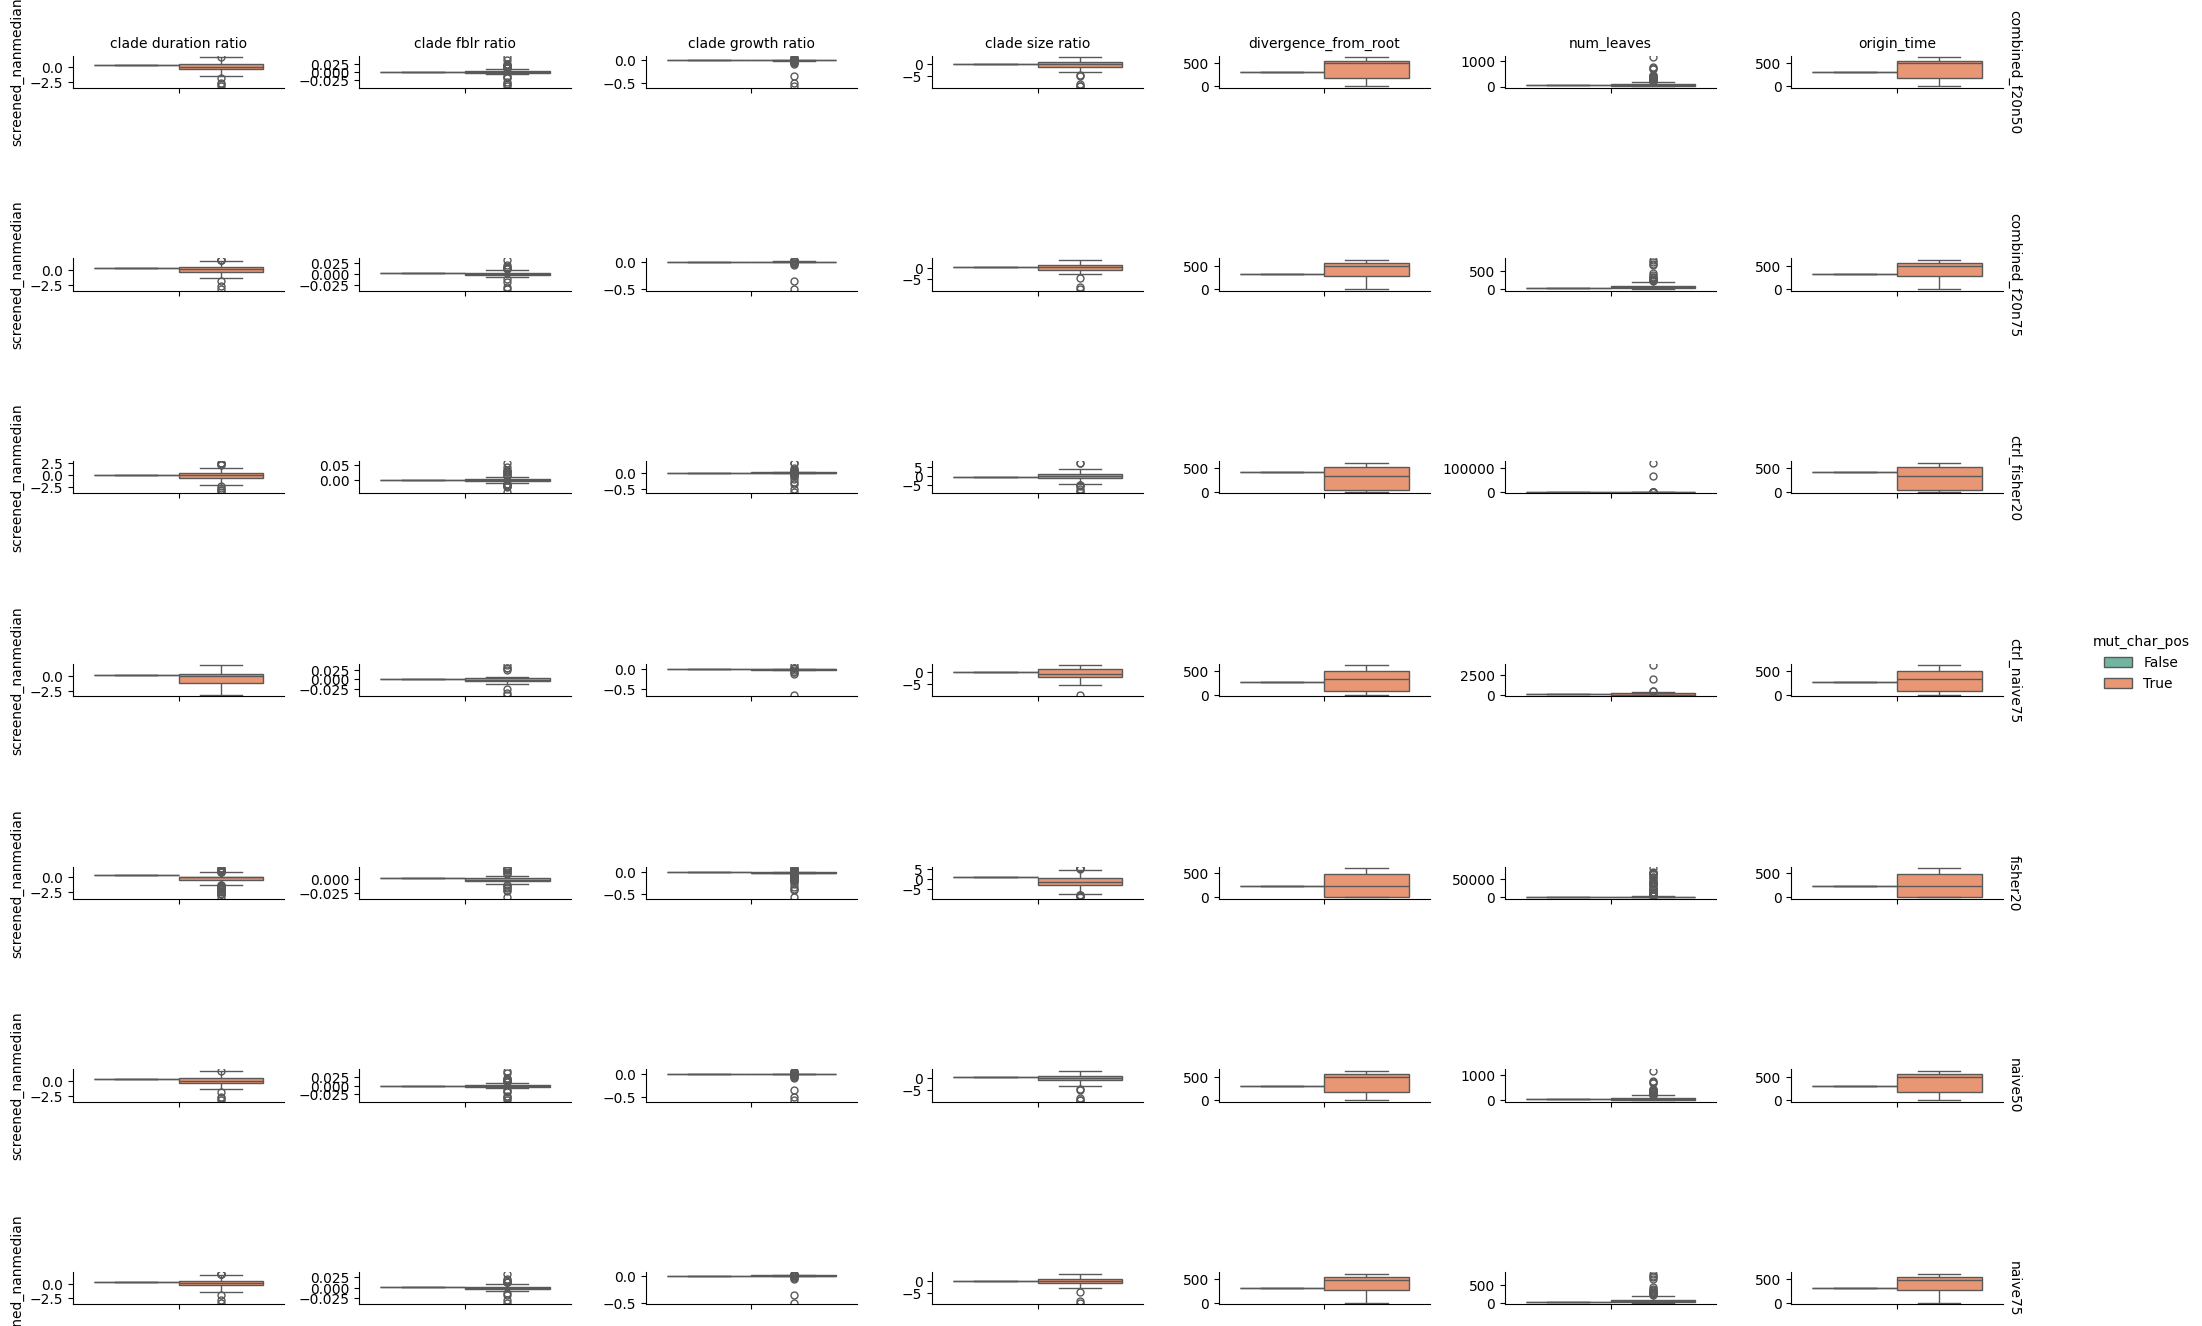

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


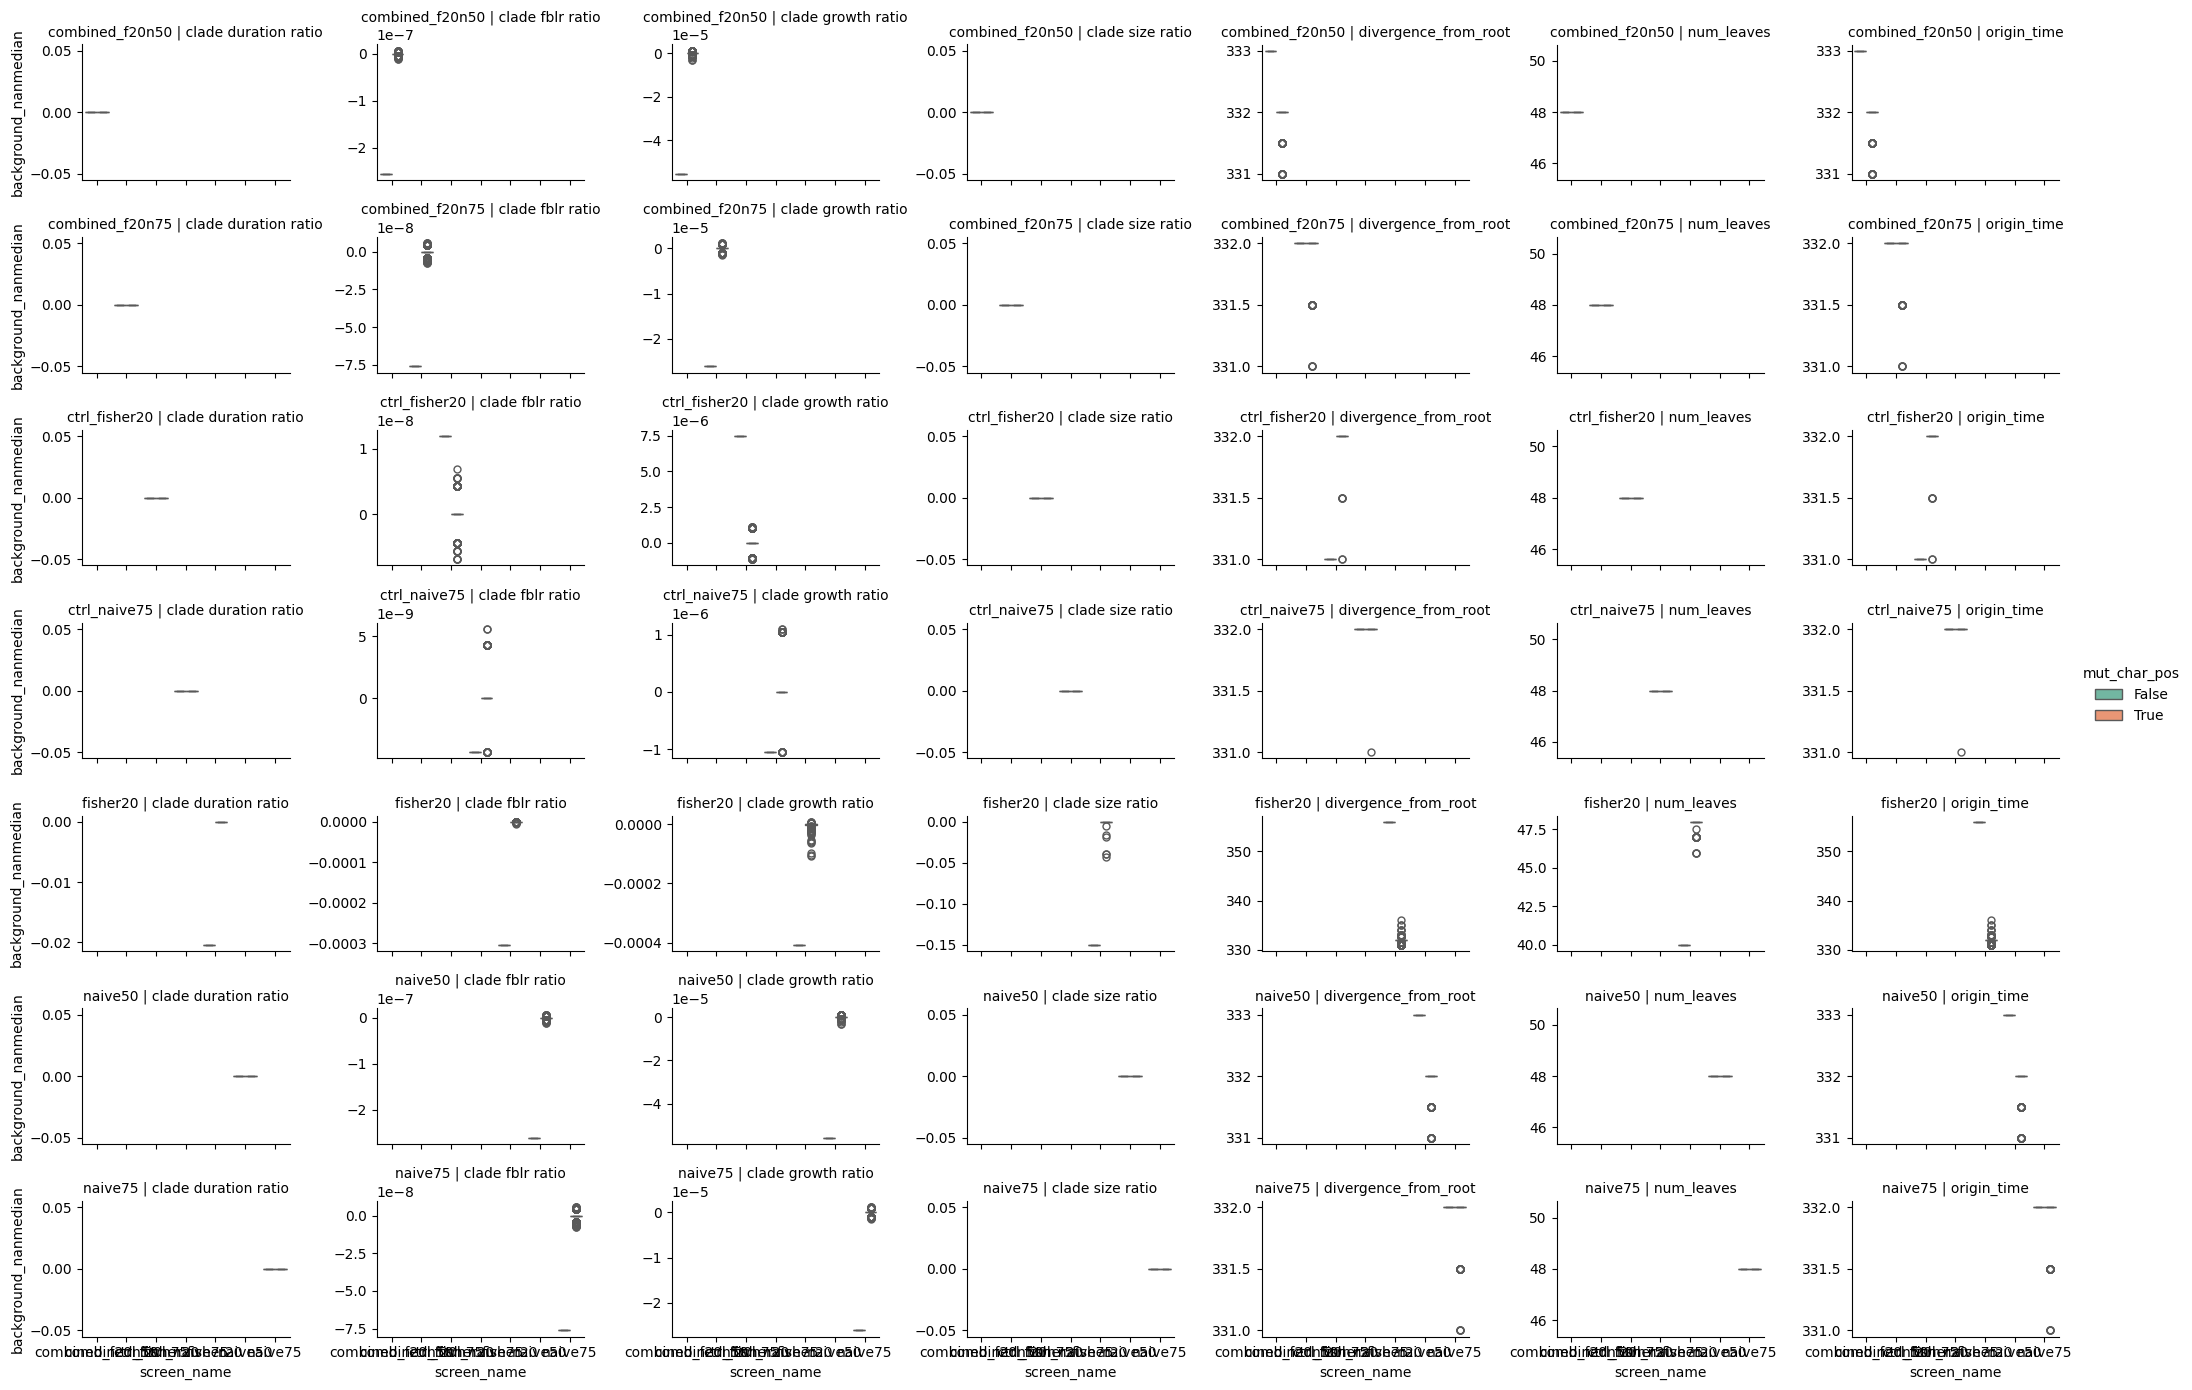

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
